# Linear Regression: Underfitting and Overfitting

In this notebook, we will explore underfitting and overfitting by using a synthetic dataset and comparing two models:
- A simple **Linear Regression**, which may suffer from **underfitting**.
- A **Polynomial Regression** with a high degree, which may suffer from **overfitting**.

We will also visualize the effects of both underfitting and overfitting.

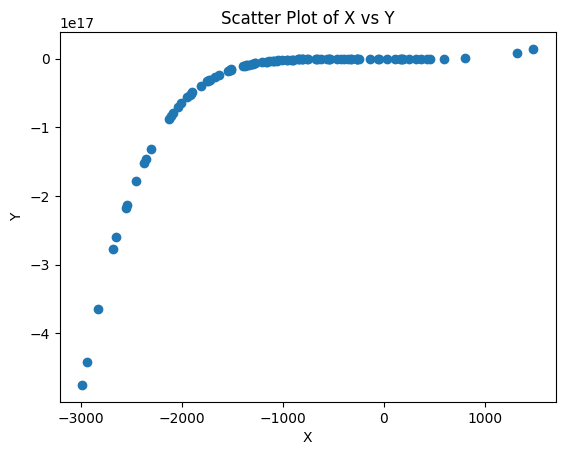

Bias: -3.28, Variance: 3.6901901171571637e+33


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
data = pd.read_csv('linear_regression-100.csv')
# Generate synthetic data (y = x^2)
#np.random.seed(42)
x = data['x'].values.reshape(-1, 1)  # Reshape for sklearn
y = data['y'].values
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot of X vs Y')
plt.show()

model = LinearRegression()
model.fit(x, y)
predictions = model.predict(x)

# Step 4: Calculate bias and variance
bias = np.mean(predictions - y)
variance = np.var(predictions)

print(f'Bias: {bias}, Variance: {variance}')

### 1. Linear Regression (Underfitting)
Let's first fit a simple Linear Regression model to the data. Since the underlying data follows a quadratic relationship, a linear model will likely underfit the data.

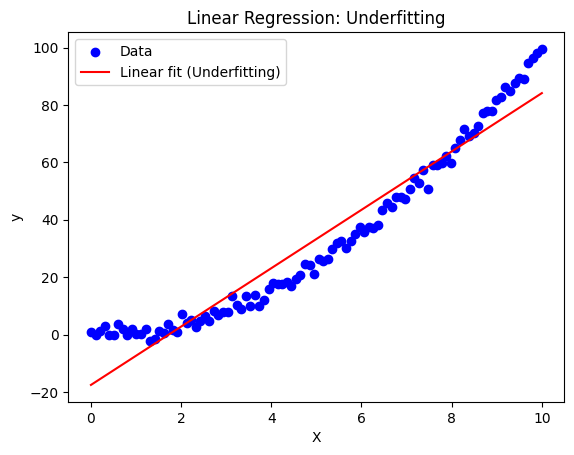

Mean Squared Error Train (Linear Regression): 66.80469564526396
Mean Squared Error Test (Linear Regression): 53.898876775955294


In [ ]:
# Fit a Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict using the linear model
y_pred_train_linear = linear_model.predict(X_train)
y_pred_test_linear = linear_model.predict(X_test)

# Plot the data and the linear regression fit
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, linear_model.predict(X), color='red', label='Linear fit (Underfitting)')
plt.title('Linear Regression: Underfitting')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Evaluate the model using Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train_linear)
mse_linear = mean_squared_error(y_test, y_pred_test_linear)
print(f'Mean Squared Error Train (Linear Regression): {mse_train}')
print(f'Mean Squared Error Test (Linear Regression): {mse_linear}')

In [ ]:
print(linear_model.intercept_)
print(linear_model.coef_)

[-17.56904663]


### 2. Polynomial Regression (Overfitting)
Now, we will use Polynomial Regression with a higher degree to capture the non-linearity in the data. A high-degree polynomial may overfit the training data.

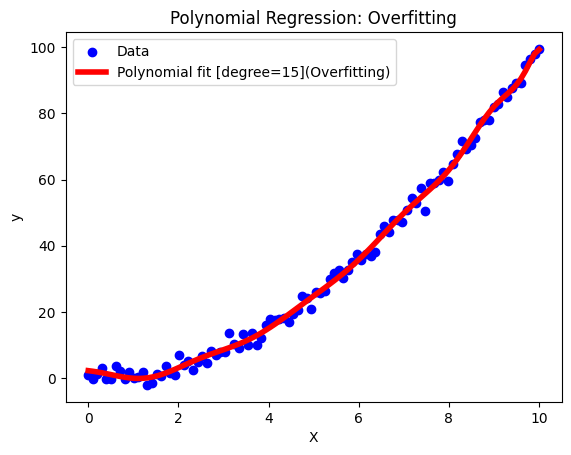

Mean Squared Error Train (Polynomial Regression): 3.0397268853039563
Mean Squared Error Test (Polynomial Regression): 2.8406227168302207


In [ ]:
# Fit a Polynomial Regression model with degree 15
poly_features = PolynomialFeatures(degree=15)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict using the polynomial model
y_pred_train_poly = poly_model.predict(X_poly_train)
y_pred_test_poly = poly_model.predict(X_poly_test)

# Plot the data and the polynomial regression fit
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, poly_model.predict(poly_features.transform(X)), color='red', linewidth=1, label='Polynomial fit [degree=15](Overfitting)')
plt.title('Polynomial Regression: Overfitting')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Evaluate the model using Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train_poly)
mse_poly = mean_squared_error(y_test, y_pred_test_poly)
print(f'Mean Squared Error Train (Polynomial Regression): {mse_train}')
print(f'Mean Squared Error Test (Polynomial Regression): {mse_poly}')

In [ ]:
print(poly_model.intercept_)
print(poly_model.coef_)

array([[ 0.        , -0.1588804 ,  1.01821679]])

### 3. Conclusion
We have demonstrated underfitting and overfitting as follows:
- **Underfitting**: The linear regression model was unable to capture the underlying quadratic relationship in the data, resulting in a poor fit.
- **Overfitting**: The polynomial regression model with a high degree was able to fit the training data almost perfectly but did not generalize well to the test data, resulting in poor performance on unseen data.

To combat overfitting, one common approach is to reduce the model complexity (e.g., reduce the degree of the polynomial) or use regularization techniques like Lasso or Ridge regression.

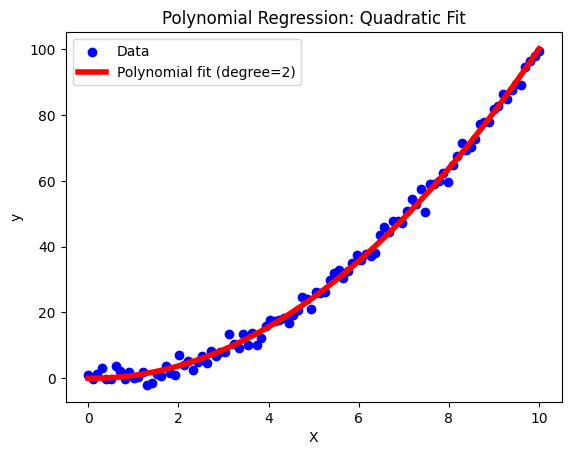

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

#Apply Polynomial Features (degree 2 for quadratic model)
poly_features = PolynomialFeatures(degree=2)
X_poly_train = poly_features.fit_transform(X_train)
X_poly_test = poly_features.transform(X_test)

# Fit a Linear Regression model to the polynomial features
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

# Predict using the polynomial model
y_pred_train = poly_model.predict(X_poly_train)
y_pred_test = poly_model.predict(X_poly_test)

# Visualize the polynomial regression model
plt.scatter(X, y, color='blue', label='Data')
plt.plot(X, poly_model.predict(poly_features.transform(X)), color='red',linewidth=1, label='Polynomial fit (degree=2)')
plt.title('Polynomial Regression: Quadratic Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [ ]:
# Evaluate the model using Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f'Mean Squared Error (Training Set): {mse_train}')
print(f'Mean Squared Error (Test Set): {mse_test}')

Mean Squared Error (Training Set): 3.688888226610535
Mean Squared Error (Test Set): 2.228294789185728


## **Bias**
Bias is simply defined as the inability of the model because of that there is some difference or error occurring between the model’s predicted value and the actual value. These differences between actual or expected values and the predicted values are known as error or bias error or error due to bias. Bias is a systematic error that occurs due to wrong assumptions in the machine learning process.

Let
Y be the true value of a parameter, and let
Y
^
  be an estimator of
Y
 based on a sample of data. Then, the bias of the estimator
Y
^
  is given by:

Bias(
Y
^
 )=E(
Y
^
 )–Y

where
E
(
Y
^
)
   is the expected value of the estimator
Y
^
 . It is the measurement of the model that how well it fits the data.

**Low Bias:** Low bias value means fewer assumptions are taken to build the target function. In this case, the model will closely match the training dataset.
**High Bias:** High bias value means more assumptions are taken to build the target function. In this case, the model will not match the training dataset closely.
The high-bias model will not be able to capture the dataset trend. It is considered as the **underfitting** model which has a high error rate. It is due to a very simplified algorithm.

## **Variance**
Variance is the measure of spread in data from its mean position. In machine learning variance is the amount by which the performance of a predictive model changes when it is trained on different subsets of the training data. More specifically, variance is the variability of the model that how much it is sensitive to another subset of the training dataset. i.e. how much it can adjust on the new subset of the training dataset.

  Then the variance of a model can be measured as the expected value of the square of the difference between predicted values and the expected value of the predicted values.

 Variance errors are either low or high-variance errors.

**Low variance:** Low variance means that the model is less sensitive to changes in the training data and can produce consistent estimates of the target function with different subsets of data from the same distribution. This is the case of underfitting when the model fails to generalize on both training and test data.
**High variance:** High variance means that the model is very sensitive to changes in the training data and can result in significant changes in the estimate of the target function when trained on different subsets of data from the same distribution. This is the case of **overfitting** when the model performs well on the training data but poorly on new, unseen test data. It fits the training data too closely that it fails on the new training dataset.